Using Quandl for Stock Visualization

In [74]:
import pandas 
import quandl 
quandl.ApiConfig.api_key = "gdY3JGqSehw6Fic1pNB5"
import datetime

In [75]:
start = datetime.datetime(2017,8,24)
end = datetime.datetime(2018,8,24)

In [76]:
s = 'NVDA'
nvidia = quandl.get('WIKI/' + s, start_date=start, end_date=end)

type(nvidia)

pandas.core.frame.DataFrame

nvidia.head()

Open    High      Low   Close      Volume  Ex-Dividend  \
Date                                                                   
2017-08-24  167.10  167.28  164.120  165.19  11592997.0          0.0   
2017-08-25  166.17  166.58  163.550  163.81   8753208.0          0.0   
2017-08-28  164.58  165.10  162.330  164.97   9568908.0          0.0   
2017-08-29  162.59  165.58  162.261  164.70   7992338.0          0.0   
2017-08-30  165.50  166.13  164.270  165.68   9469680.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2017-08-24          1.0     167.10     167.28   164.120      165.19   
2017-08-25          1.0     166.17     166.58   163.550      163.81   
2017-08-28          1.0     164.58     165.10   162.330      164.97   
2017-08-29          1.0     162.59     165.58   162.261      164.70   
2017-08-30          1.0     165.50     166.13   164.270      165.68   

            Adj. Volume  
Date                     
2017-08-24   11592997.0  
2017-08-25    8753208.0  
2017-08-28    9568908.0  
2017-08-29    7992338.0  
2017-08-30    9469680.0

Populating the interactive namespace from numpy and matplotlib


Text(0.5,0,'Date')

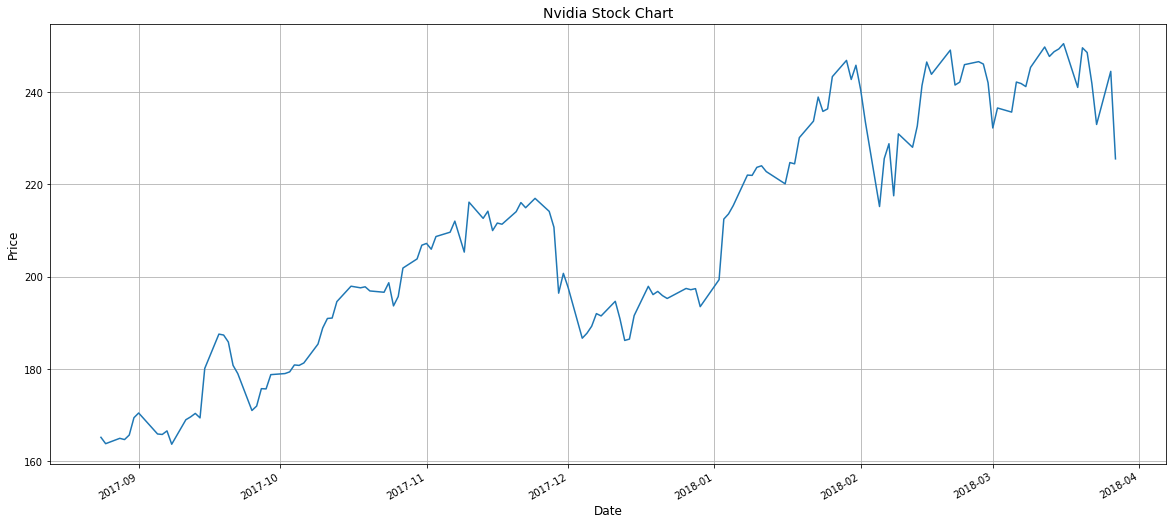

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
 
pylab.rcParams['figure.figsize'] = (20, 9)

nvidia["Adj. Close"].plot(grid = True)

plt.title('Nvidia Stock Chart', fontsize = 14)
plt.ylabel('Price', fontsize = 12)
plt.xlabel('Date', fontsize = 12)

In [78]:
micron, intel = (quandl.get('WIKI/' + s, start_date=start, end_date=end) for s in ['MU', 'INTC'])

stocks = pd.DataFrame({'NVDA': nvidia['Adj. Close'], 'MU': micron['Adj. Close'], 'INTC': intel['Adj. Close']})

stocks.head()

NVDA     MU       INTC
Date                                
2017-08-24  165.19  30.22  34.307714
2017-08-25  163.81  30.29  34.268177
2017-08-28  164.97  31.08  34.248409
2017-08-29  164.70  31.48  34.327482
2017-08-30  165.68  31.61  34.485628

Text(0.5,1,'Correlation of NVDA, INTC, MU by Price')

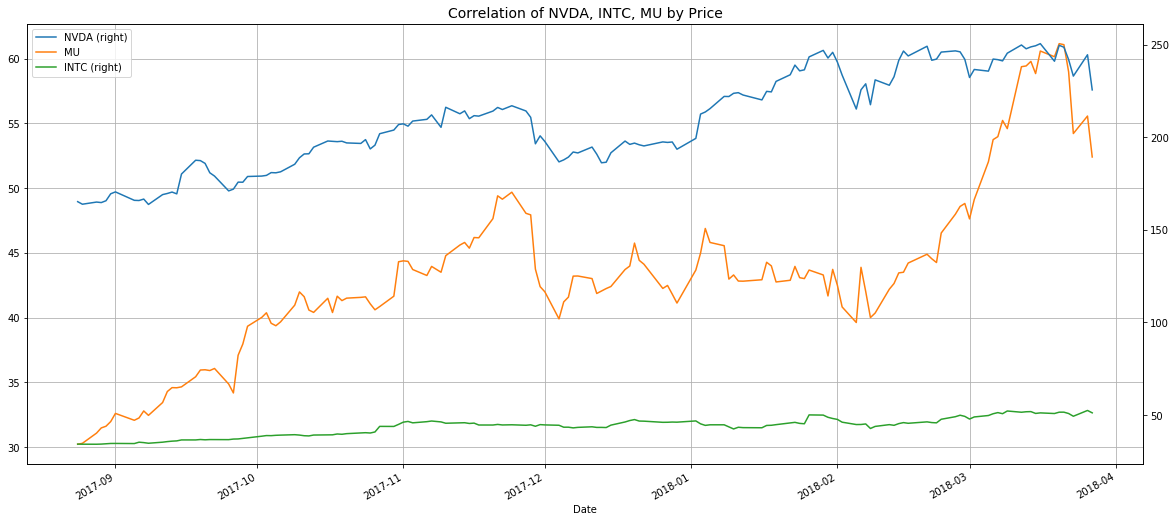

In [79]:
stocks.plot(secondary_y = ['NVDA', 'INTC'], grid = True)
plt.title('Correlation of NVDA, INTC, MU by Price', fontsize = 14)

In [80]:
stock_return = stocks.apply(lambda x: x / x[0])

stock_return.head() - 1

NVDA        MU      INTC
Date                                    
2017-08-24  0.000000  0.000000  0.000000
2017-08-25 -0.008354  0.002316 -0.001152
2017-08-28 -0.001332  0.028458 -0.001729
2017-08-29 -0.002966  0.041694  0.000576
2017-08-30  0.002966  0.045996  0.005186

Text(0.5,1,'Correlation of NVDA, MU, INTC using Lambda')

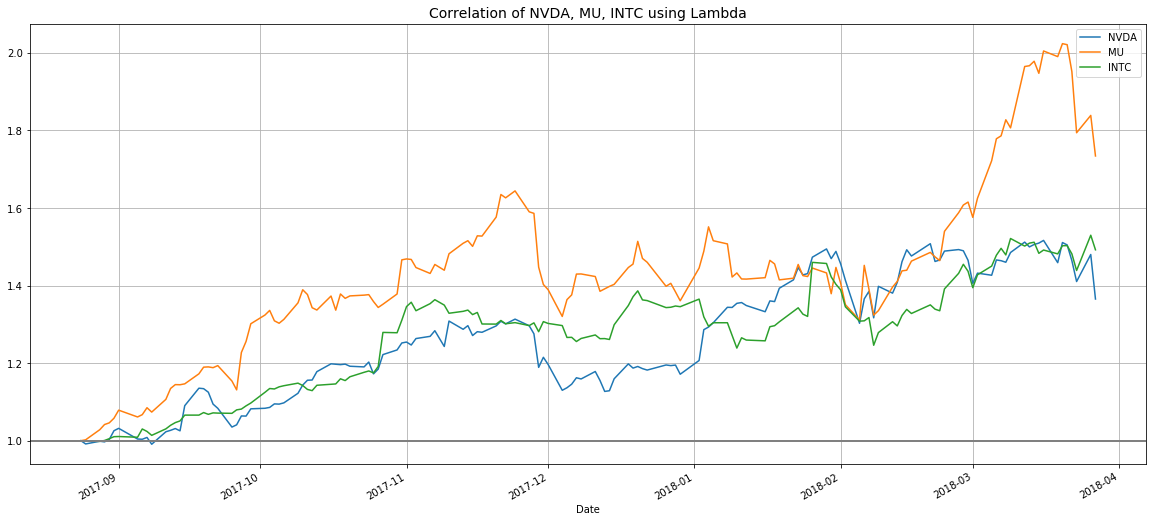

In [81]:
stock_return.plot(grid = True).axhline(y = 1, color = 'grey', lw = 2)
plt.title('Correlation of NVDA, MU, INTC using Lambda', fontsize = 14)